In [1]:
# Install required packages (uncomment if running in a new environment)
!pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Health Risk BMI Prediction Assignment
This notebook demonstrates a simple machine learning workflow to predict health risk based on BMI and other features.

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Create Dummy Dataset

In [3]:
# Create a dummy dataset for BMI and health risk
np.random.seed(42)
size = 200
data = pd.DataFrame({
    'age': np.random.randint(18, 65, size),
    'bmi': np.random.uniform(18, 40, size),
    'smoker': np.random.choice([0, 1], size),
    'exercise': np.random.choice([0, 1], size),
})
# Health risk: 1 if BMI > 30 or smoker, else 0
data['risk'] = ((data['bmi'] > 30) | (data['smoker'] == 1)).astype(int)
data.head()

,age,bmi,smoker,exercise,risk
0,56,23.539211,0,0,0
1,46,28.939467,1,1,1
2,32,24.619323,0,1,0
3,60,24.266491,1,0,1
4,25,18.811513,1,0,1


## Step 3: Data Exploration

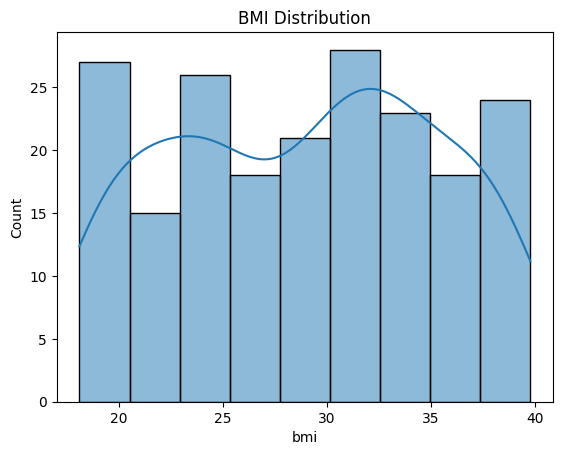

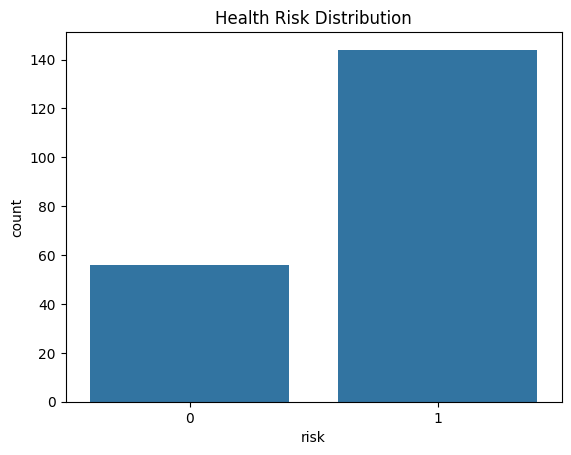

In [4]:
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.countplot(x='risk', data=data)
plt.title('Health Risk Distribution')
plt.show()

## Step 4: Model Training

In [5]:
X = data[['age', 'bmi', 'smoker', 'exercise']]
y = data['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 5: Model Evaluation

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        28

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



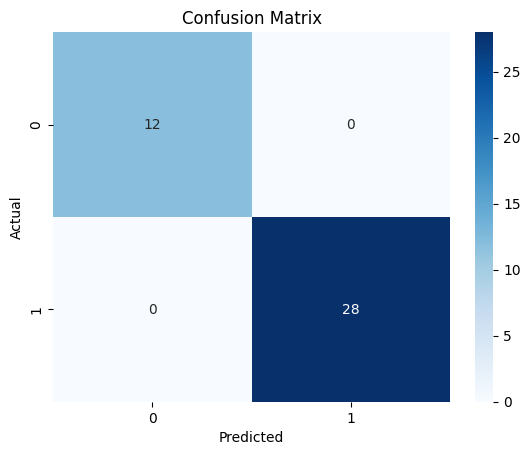

In [6]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 6: Prediction on New Data

In [7]:
# Predict health risk for new individuals
new_people = pd.DataFrame({
    'age': [25, 50],
    'bmi': [22, 35],
    'smoker': [0, 1],
    'exercise': [1, 0]
})
risk_pred = model.predict(new_people)
print('Predicted health risk:', risk_pred)

Predicted health risk: [0 1]


## Step 7: Summary
- Logistic Regression model predicts health risk based on BMI, age, smoking, and exercise.
- High BMI and smoking are strong risk factors in this dummy dataset.
- This workflow can be extended to real health datasets for risk prediction.